<a href="https://colab.research.google.com/github/YounSooKimTech/NLP_Power/blob/main/Enron_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N tokens

In [10]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/NLP_Power/main/Enron_merged_df.csv')
df.fillna('', inplace=True)


In [11]:
print(df.groupby("direction")["tokens"].apply(lambda x: x.apply(len).mean()))

print("\n")

print(df.groupby("direction")["cleaned_tokens"].apply(lambda x: x.apply(len).mean()))


direction
downward    222.223089
same        291.542440
upward      409.653355
Name: tokens, dtype: float64


direction
downward    126.313573
same        159.964191
upward      236.500000
Name: cleaned_tokens, dtype: float64


In [13]:
df["n_tokens"] = df["tokens"].apply(len)
df["n_cleaned_tokens"] = df["cleaned_tokens"].apply(len)

                    sum_sq      df         F    PR(>F)
C(direction)  4.049455e+06     2.0  5.430588  0.004445
Residual      7.523863e+08  2018.0       NaN       NaN



  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper   reject
-------------------------------------------------------
downward   same  33.6506 0.5606  -43.29 110.5912  False
downward upward 110.1864 0.0038 29.7125 190.6604   True
    same upward  76.5358 0.0535 -0.9014 153.9731  False
-------------------------------------------------------





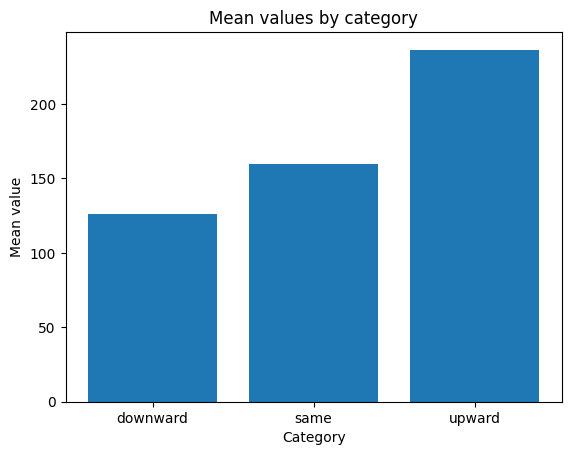

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# fit an ANOVA model with the 'values' column as the dependent variable and the 'group' column as the independent variable
model = ols('n_cleaned_tokens ~ C(direction)', data=df).fit()

# perform an ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['n_cleaned_tokens'], df['direction'])

# print the Tukey's HSD results
print(tukey_results)
print("\n\n")

import matplotlib.pyplot as plt
means =df.groupby('direction')['n_cleaned_tokens'].mean()
plt.bar(means.index, means.values)
plt.title('Mean values by category')
plt.xlabel('Category')
plt.ylabel('Mean value')
plt.show()


# sentiment

In [16]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/NLP_Power/main/Enron_merged_df.csv')
df.fillna('', inplace=True)


df.head(1)

,Receiver_Name,Receiver_Email,Receiver_Position,Receiver_Rank,Sender_Name,Sender_Email,Sender_Position,Sender_Rank,file,message,Subject,Body,Date,timezone,content,Date_UTC,Sender-Receiver,direction,tokens,cleaned_tokens
0,Andrew Lewis,andrew.lewis@enron.com,Vice President,4,Hunter Shively,hunter.shively@enron.com,Vice President,4,lewis-a/all_documents/6.,Message-ID: <20773283.1075848285687.JavaMail.e...,Western Frontier,---------------------- Forwarded by Hunter S S...,"Mon, 26 Mar 2001 02:44:00 -0800 (PST)",PST,,2001-03-26 10:44:00+00:00,0,same,[],[]


In [17]:
import pandas as pd
from textblob import TextBlob

# Define function to get sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply function to each row of dataframe
df['sentiment'] = df['content'].apply(get_sentiment)


In [18]:
df.groupby("direction")["sentiment"].mean()

direction
downward    0.094941
same        0.056201
upward      0.098923
Name: sentiment, dtype: float64

                 sum_sq      df          F    PR(>F)
C(direction)   0.788335     2.0  10.988535  0.000018
Residual      72.387309  2018.0        NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same  -0.0387 0.0004 -0.0626 -0.0149   True
downward upward    0.004 0.9257  -0.021  0.0289  False
    same upward   0.0427 0.0001  0.0187  0.0667   True
------------------------------------------------------





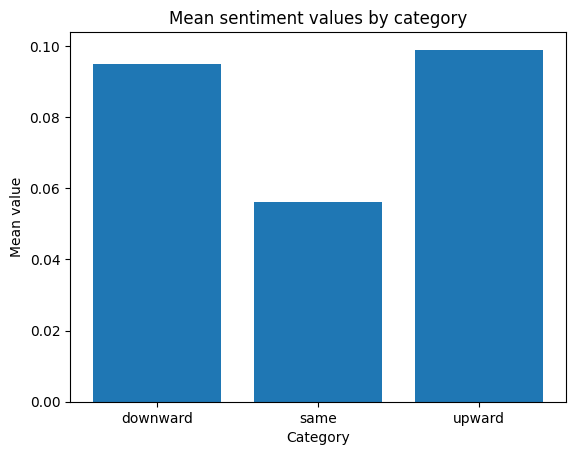

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# fit an ANOVA model with the 'values' column as the dependent variable and the 'group' column as the independent variable
model = ols('sentiment ~ C(direction)', data=df).fit()

# perform an ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df["sentiment"], df['direction'])

# print the Tukey's HSD results
print(tukey_results)
print("\n\n")

import matplotlib.pyplot as plt
means =df.groupby('direction')['sentiment'].mean()
plt.bar(means.index, means.values)
plt.title('Mean sentiment values by category')
plt.xlabel('Category')
plt.ylabel('Mean value')
plt.show()


# left on read

In [122]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/NLP_Power/main/Enron_merged_df.csv')
df.fillna('', inplace=True)

df.head(1)

,Receiver_Name,Receiver_Email,Receiver_Position,Receiver_Rank,Sender_Name,Sender_Email,Sender_Position,Sender_Rank,file,message,Subject,Body,Date,timezone,content,Date_UTC,Sender-Receiver,direction,tokens,cleaned_tokens
0,Andrew Lewis,andrew.lewis@enron.com,Vice President,4,Hunter Shively,hunter.shively@enron.com,Vice President,4,lewis-a/all_documents/6.,Message-ID: <20773283.1075848285687.JavaMail.e...,Western Frontier,---------------------- Forwarded by Hunter S S...,"Mon, 26 Mar 2001 02:44:00 -0800 (PST)",PST,,2001-03-26 10:44:00+00:00,0,same,[],[]


In [74]:
print(len(df[(df["Sender_Email"] == "jeff.dasovich@enron.com") & (df["Receiver_Email"] == "christopher.calger@enron.com")]))

print(len(df[(df["Sender_Email"] == "christopher.calger@enron.com") & (df["Receiver_Email"] == "jeff.dasovich@enron.com")]))


14
5


In [115]:
unique_senders = df["Sender_Email"].unique().tolist()
unique_receivers = df["Receiver_Email"].unique().tolist()
email_list = list(set(unique_senders + unique_receivers))

count = 0
data = []
for a_mail in email_list:
    for b_mail in email_list:
        if a_mail != b_mail:
            # Count for a_mail as sender and b_mail as receiver
            df_filtered1 = df.loc[(df['Sender_Email'] == a_mail) & (df['Receiver_Email'] == b_mail)]
            freq1 = len(df_filtered1)

            # Count for b_mail as sender and a_mail as receiver
            df_filtered2 = df.loc[(df['Sender_Email'] == b_mail) & (df['Receiver_Email'] == a_mail)]
            freq2 = len(df_filtered2)

            if freq1 > 0 or freq2 > 0:
                data.append({'Sender': a_mail, 'Receiver': b_mail, 'a_mail to b_mail': freq1, 'b_mail to a_mail': freq2})

df_freq = pd.DataFrame(data)
df_freq

df_freq[df_freq["Sender"] == "jeff.dasovich@enron.com"]



,Sender,Receiver,a_mail to b_mail,b_mail to a_mail
286,jeff.dasovich@enron.com,richard.sanders@enron.com,1,0
287,jeff.dasovich@enron.com,frank.vickers@enron.com,1,1
288,jeff.dasovich@enron.com,lysa.akin@enron.com,8,7
289,jeff.dasovich@enron.com,robert.badeer@enron.com,1,4
290,jeff.dasovich@enron.com,jdasovic@enron.com,5,0
291,jeff.dasovich@enron.com,shelley.corman@enron.com,1,1
292,jeff.dasovich@enron.com,christopher.calger@enron.com,14,5
293,jeff.dasovich@enron.com,kevin.hyatt@enron.com,1,0
294,jeff.dasovich@enron.com,steven.kean@enron.com,13,22
295,jeff.dasovich@enron.com,james.steffes@enron.com,61,26


In [149]:
df_status = df[["Receiver_Email", "Sender_Email", "direction"]]
df_status= df_status.rename(columns={'direction': 'original_direction'})

df_status.head()

commu_freq = pd.merge(df_status, df_freq, left_on = ["Receiver_Email", "Sender_Email"], right_on = ["Sender", "Receiver"])
commu_freq = commu_freq.drop(["Receiver_Email", "Sender_Email"], axis=1)

In [160]:
print(commu_freq.groupby("original_direction")["a_mail to b_mail"].sum())

print(commu_freq.groupby("original_direction")["b_mail to a_mail"].sum())


original_direction
downward    4417
same        7140
upward      4417
Name: a_mail to b_mail, dtype: int64
original_direction
downward    6095
same        8907
upward      8648
Name: b_mail to a_mail, dtype: int64


In [161]:
commu_freq["left_on_read"] = (commu_freq["a_mail to b_mail"] > commu_freq["b_mail to a_mail"]).astype(int)

commu_freq.groupby("original_direction")["left_on_read"].sum()

original_direction
downward    107
same        135
upward      139
Name: left_on_read, dtype: int64

                           sum_sq      df         F    PR(>F)
C(original_direction)    1.395903     2.0  4.301396  0.013685
Residual               301.644376  1859.0       NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
downward   same     0.06 0.0244  0.0062 0.1138   True
downward upward   0.0551 0.0397   0.002 0.1082   True
    same upward  -0.0048  0.976 -0.0589 0.0493  False
-----------------------------------------------------





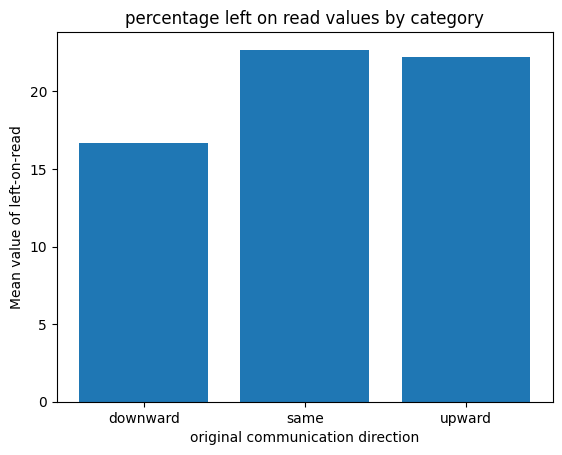

In [170]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# fit an ANOVA model with the 'values' column as the dependent variable and the 'group' column as the independent variable
model = ols('left_on_read ~ C(original_direction)', data=commu_freq).fit()

# perform an ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(commu_freq["left_on_read"], commu_freq['original_direction'])

# print the Tukey's HSD results
print(tukey_results)
print("\n\n")

import matplotlib.pyplot as plt
means =commu_freq.groupby('original_direction')['left_on_read'].mean()*100
plt.bar(means.index, means.values)
plt.title('percentage left on read values by category')
plt.xlabel('original communication direction')
plt.ylabel('Mean value of left-on-read')
plt.show()


# response time difference

In [424]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/NLP_Power/main/Enron_merged_df.csv')
df.fillna('', inplace=True)

# df.head(1)

In [425]:
df_re = df[df["Subject"].str.startswith("RE: ")]
df_re = df_re.reset_index(drop=True)


print(df.shape, df_re.shape)

# df_re.head(2)

(2021, 20) (59, 20)


In [426]:
import warnings
warnings.filterwarnings("ignore")

df_re_org = df_re[["message", "direction"]]

# df_re_org.head()

In [427]:
df_re_org["re"] = df_re["message"].str.split(' -----Original Message-----|---------------------- Forwarded ', expand=True)[0]
df_re_org["org"] = df_re["message"].str.split(' -----Original Message-----|---------------------- Forwarded ', expand=True)[1]

df_re_org['index_column'] = range(0, len(df_re_org))

# Set the new column as the index
df_re_org = df_re_org.set_index('index_column')

df_result = df_re_org.dropna()

print(df_re_org.shape, df_result.shape)

(59, 4) (48, 4)


In [428]:
df_result.info()

df_result['org'] = df_result['org'].astype(str)
df_result['re'] = df_result['re'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 58
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    48 non-null     object
 1   direction  48 non-null     object
 2   re         48 non-null     object
 3   org        48 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


In [429]:
print(df_result.org.dtype,df_result.re.dtype)

object object


In [430]:
df_result.to_csv("Enron_timedelta.csv", index = False)

from google.colab import files
files.download("Enron_timedelta.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [431]:
import re

def get_from(x):
    match = re.search(r"From:\s+(.*)\s+Sent:", x)
    return match.group(1).strip() if match else ''

def get_sent(x):
    match = re.search(r"Sent:\s+(.*)\s+To:", x)
    return match.group(1).strip() if match else ''

def get_to(x):
    match = re.search(r"To:\s+(.*)\s+Subject:", x)
    return match.group(1).strip() if match else ''

def get_subject(x):
    match = re.search(r"Subject:\s+(.*)\s+", x)
    return match.group(1).strip() if match else ''

df_result['Org_Sent'] = df_result['org'].apply(get_sent)
df_result['Org_From'] = df_result['org'].apply(get_from)
df_result['Org_To'] = df_result['org'].apply(get_to)
df_result['Org_Subject'] = df_result['org'].apply(get_subject)


In [432]:
import re

def get_from(x):
    match = re.search(r"From:\s+(.*)\s+Sent:", x)
    return match.group(1).strip() if match else ''

def get_date(x):
    match = re.search(r"Date:\s+(\w+,\s+\d+\s+\w+\s+\d+\s+\d+:\d+)", x)
    return match.group(1).strip() if match else ''

def get_to(x):
    match = re.search(r"To:\s+(.*)\s+Subject:", x)
    return match.group(1).strip() if match else ''

def get_subject(x):
    match = re.search(r"Subject:\s+(.*)\s+", x)
    return match.group(1).strip() if match else ''

df_result['RE_Sent'] = df_result['re'].apply(get_date)
df_result['RE_From'] = df_result['re'].apply(get_from)
df_result['RE_To'] = df_result['re'].apply(get_to)
df_result['RE_Subject'] = df_result['re'].apply(get_subject)

In [433]:
df_result.head()

,message,direction,re,org,Org_Sent,Org_From,Org_To,Org_Subject,RE_Sent,RE_From,RE_To,RE_Subject
index_column,,,,,,,,,,,,
0,Message-ID: <24452992.1075857692102.JavaMail.e...,downward,Message-ID: <24452992.1075857692102.JavaMail.e...,"\nFrom: \tZipper, Andy \nSent:\tMonday, April...","Monday, April 30, 2001 1:40 PM","Zipper, Andy","Lavorato, John",RE: DRAFT PRESS RELEASE: Enron to Provide Data...,"Mon, 30 Apr 2001 11:50",,andy.zipper@enron.com,RE: DRAFT PRESS RELEASE: Enron to Provide Data...
1,Message-ID: <15579767.1075860197121.JavaMail.e...,upward,Message-ID: <15579767.1075860197121.JavaMail.e...,"\nFrom: Taylor, Mark =20\nSent: Thursday, Mar...","Thursday, March 15, 2001 8:52 AM","Taylor, Mark =20","Zipper, Andy",(01-91) Exchange Selects GlobalView Software I...,"Thu, 15 Mar 2001 02:00",,andy.zipper@enron.com,RE: (01-91) Exchange Selects GlobalView Softwa...
2,Message-ID: <26955589.1075857692630.JavaMail.e...,downward,Message-ID: <26955589.1075857692630.JavaMail.e...,"\nFrom: \tTycholiz, Barry \nSent:\tTuesday, F...","Tuesday, February 06, 2001 7:43 AM","Tycholiz, Barry","Lavorato, John J.",EOL Summary report,"Wed, 7 Feb 2001 06:30",,barry.tycholiz@enron.com,RE: EOL Summary report
3,Message-ID: <897530.1075857694572.JavaMail.eva...,downward,Message-ID: <897530.1075857694572.JavaMail.eva...,"\nFrom: \tTycholiz, Barry \nSent:\tMonday, Ap...","Monday, April 23, 2001 3:52 PM","Tycholiz, Barry","Lavorato, John",No Subject,"Mon, 23 Apr 2001 16:00",,barry.tycholiz@enron.com,RE: No Subject
4,Message-ID: <16305617.1075857695108.JavaMail.e...,downward,Message-ID: <16305617.1075857695108.JavaMail.e...,"\nFrom: \tTycholiz, Barry \nSent:\tTuesday, F...","Tuesday, February 27, 2001 7:36 AM","Tycholiz, Barry","Lavorato, John",Pebble.,"Tue, 27 Feb 2001 07:36",,barry.tycholiz@enron.com,RE: Pebble.


In [434]:
df_result = df_result.fillna('')
df_result = df_result.rename(columns={'direction': 'original_direction'})


In [435]:
df_result['time1'] = pd.to_datetime(df_result['RE_Sent'], format='%a, %d %b %Y %H:%M')
df_result['time2'] = pd.to_datetime(df_result['Org_Sent'], format='%A, %B %d, %Y %I:%M %p', errors="coerce")


In [436]:
df_result_drop = df_result.dropna()

print(df_result.shape, df_result_drop.shape)

(48, 14) (39, 14)


In [437]:
df_result_drop["diff"] = (df_result_drop["time2"] - df_result_drop["time1"]).dt.total_seconds()/60
df_result_drop[["RE_Sent","Org_Sent","diff"]]

,RE_Sent,Org_Sent,diff
index_column,,,
0,"Mon, 30 Apr 2001 11:50","Monday, April 30, 2001 1:40 PM",110.0
1,"Thu, 15 Mar 2001 02:00","Thursday, March 15, 2001 8:52 AM",412.0
2,"Wed, 7 Feb 2001 06:30","Tuesday, February 06, 2001 7:43 AM",-1367.0
3,"Mon, 23 Apr 2001 16:00","Monday, April 23, 2001 3:52 PM",-8.0
4,"Tue, 27 Feb 2001 07:36","Tuesday, February 27, 2001 7:36 AM",0.0
5,"Thu, 22 Feb 2001 17:38","Thursday, February 22, 2001 1:58 PM",-220.0
6,"Tue, 17 Apr 2001 08:10","Tuesday, April 17, 2001 9:25 AM",75.0
7,"Mon, 26 Feb 2001 05:38","Friday, February 23, 2001 5:48 PM",-3590.0
8,"Fri, 9 Feb 2001 05:40","Thursday, February 08, 2001 11:24 AM",-1096.0


In [438]:
df_result_drop = df_result_drop[df_result_drop["diff"] >= 0]


df_result_drop.groupby("original_direction")["diff"].mean()

original_direction
downward    107.181818
same        117.000000
upward      412.000000
Name: diff, dtype: float64

                             sum_sq    df         F    PR(>F)
C(original_direction)  85395.440559   2.0  6.915771  0.013009
Residual               61739.636364  10.0       NaN       NaN



   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
downward   same   9.8182 0.9921 -215.1557 234.7921  False
downward upward 304.8182 0.0102   79.8443 529.7921   True
    same upward    295.0 0.0576   -9.6161 599.6161  False
---------------------------------------------------------





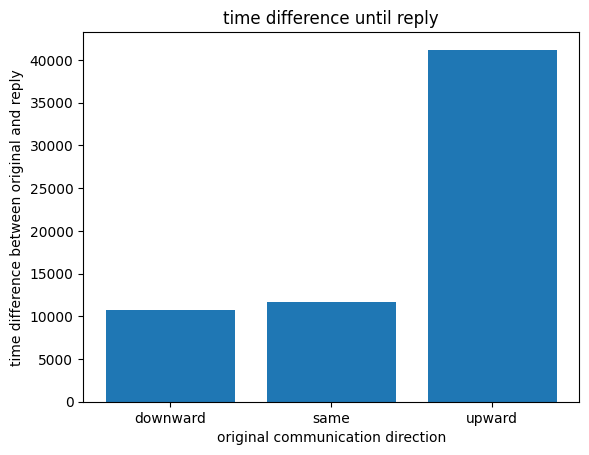

In [440]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# fit an ANOVA model with the 'values' column as the dependent variable and the 'group' column as the independent variable
model = ols('diff ~ C(original_direction)', data=df_result_drop).fit()

# perform an ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df_result_drop["diff"], df_result_drop['original_direction'])

# print the Tukey's HSD results
print(tukey_results)
print("\n\n")

import matplotlib.pyplot as plt
means =df_result_drop.groupby('original_direction')['diff'].mean()*100
plt.bar(means.index, means.values)
plt.title('time difference until reply')
plt.xlabel('original communication direction')
plt.ylabel('time difference between original and reply')
plt.show()